In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from ISLP import load_data

In [2]:
auto = load_data("Auto")

## Part 1

- Provide an overview over the data with a mixture of plots and statistical indicators. Pay attention to the scale of each datapoint and create appropriate visualizations that help you understand the data, in particular the relationship between mpg, origin and other variables. Provide interpretations and hypotheses for your findings! [5]

In [3]:
# Look at example data from the dataset

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# name is only a string variable - it seems the first word is the manifacturer, maybe extracting it into a category?

In [5]:
# Get a feeling for the scale of the data

auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Check for missing values

missing_values = auto.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [7]:
# Check for NA values

na_count = auto.isna().sum()
print(na_count)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [8]:
# auto.dropna(inplace=True)

In [9]:
# Get the datatypes in the set

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [10]:
# Get all numerical features

numerical_features = auto.select_dtypes(include=['float64', 'int64']).columns

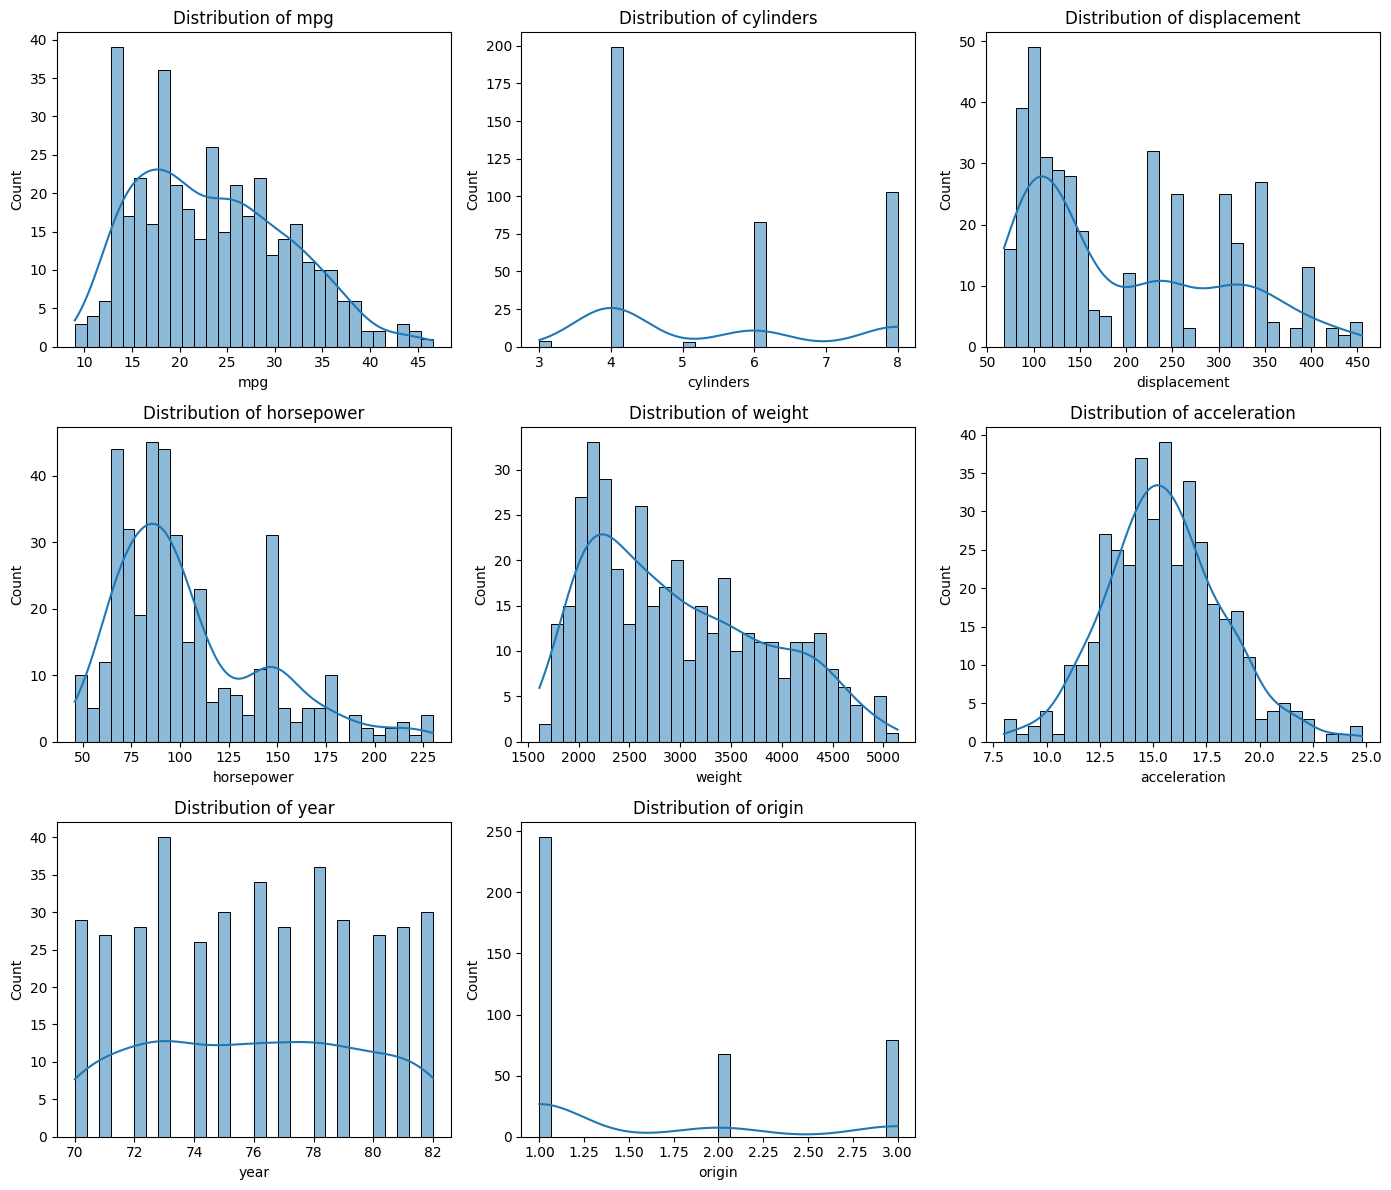

In [11]:
# Show distributions of numerical features

plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(auto[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11775/3535917277.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = auto.corr()


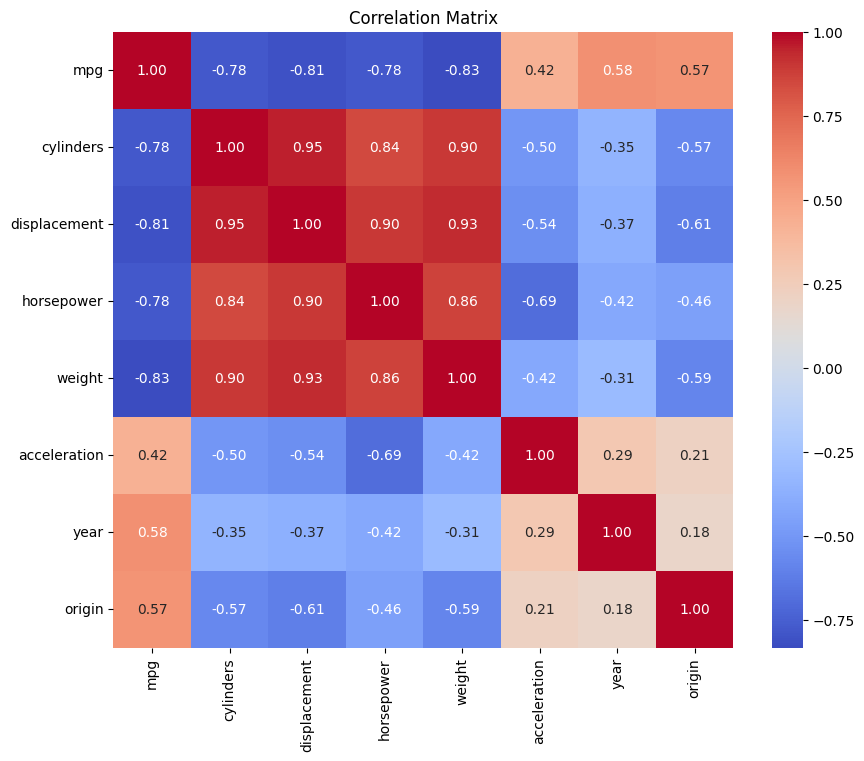

In [12]:
# Analyze correlations between values

plt.figure(figsize=(10, 8))
correlation_matrix = auto.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Looking for values 
#   - close to 1 indicating a strong positive linear relationship, 
#   - close to -1 indicating a strong negative linear relationship
#   - close to 0 indicating a weak liner relationship

# Close relationships seem to be in the upper left quarter of the matrix.

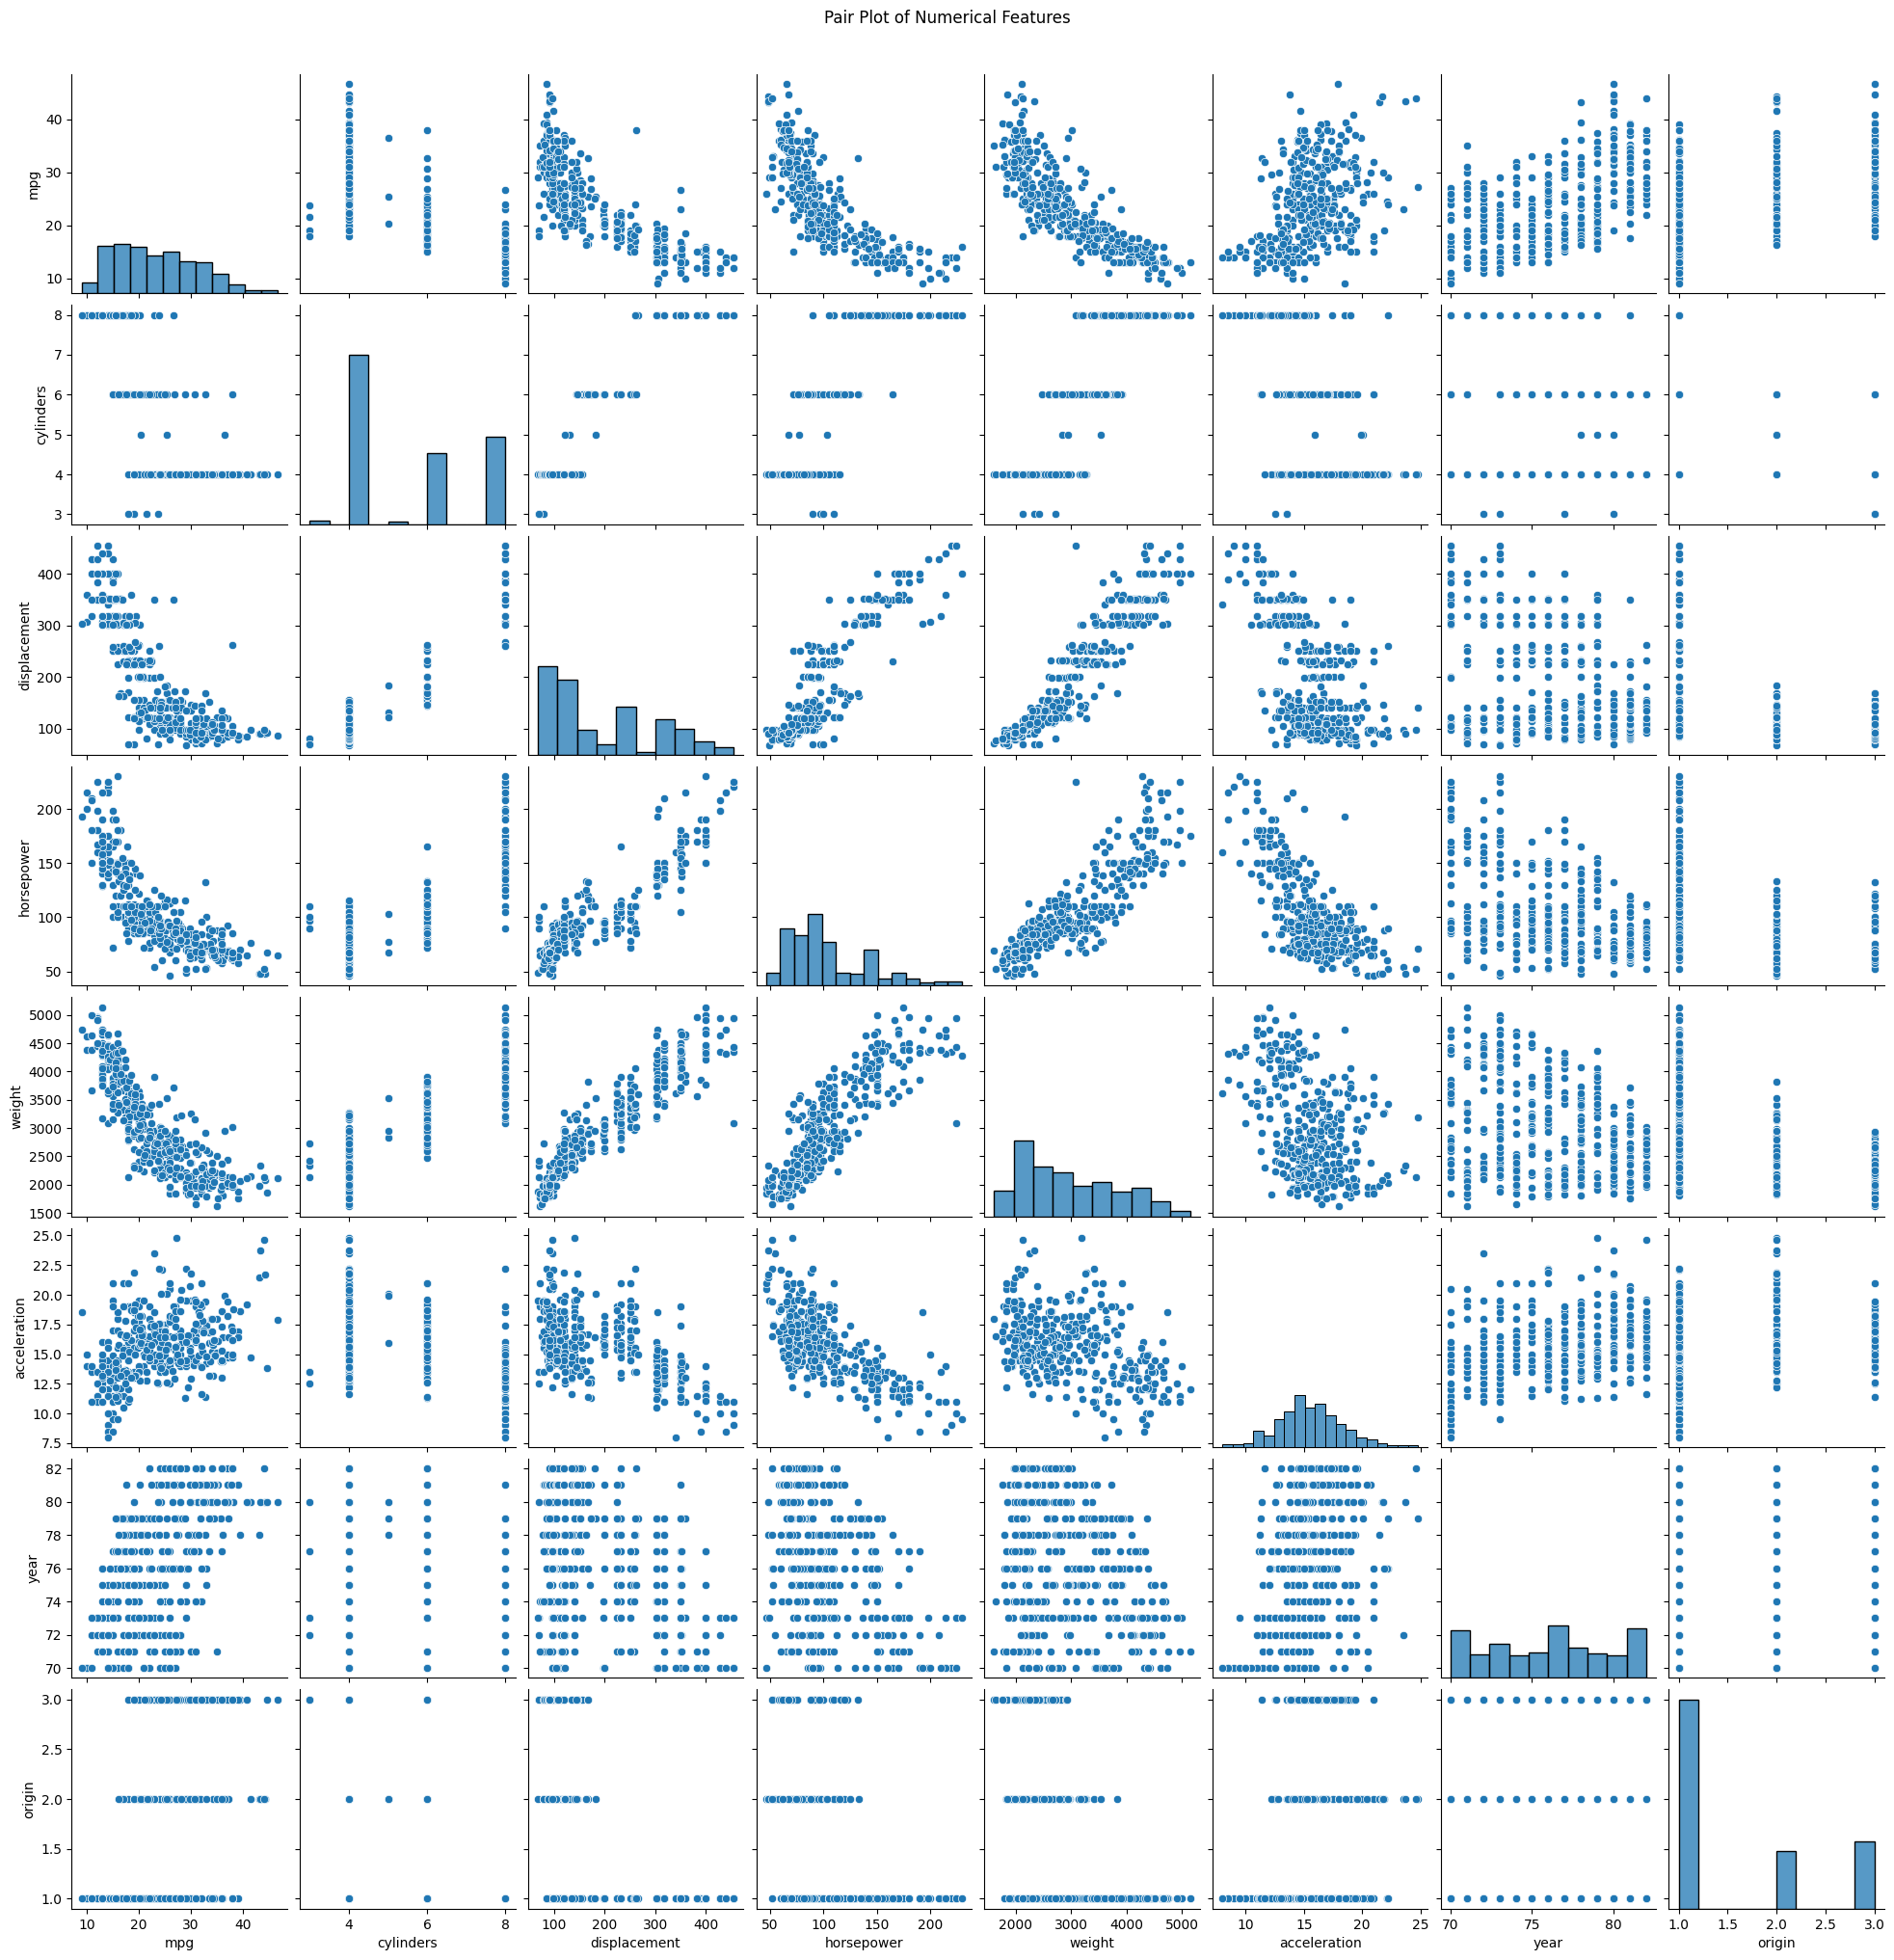

In [14]:
# Pairplots to see the relationships between the values

sns.pairplot(auto)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [15]:
# most notable
#
#   mpg with displacement, horsepower and weight
#   displacement with horsepower and weight linear
#   horsepower with weight linear

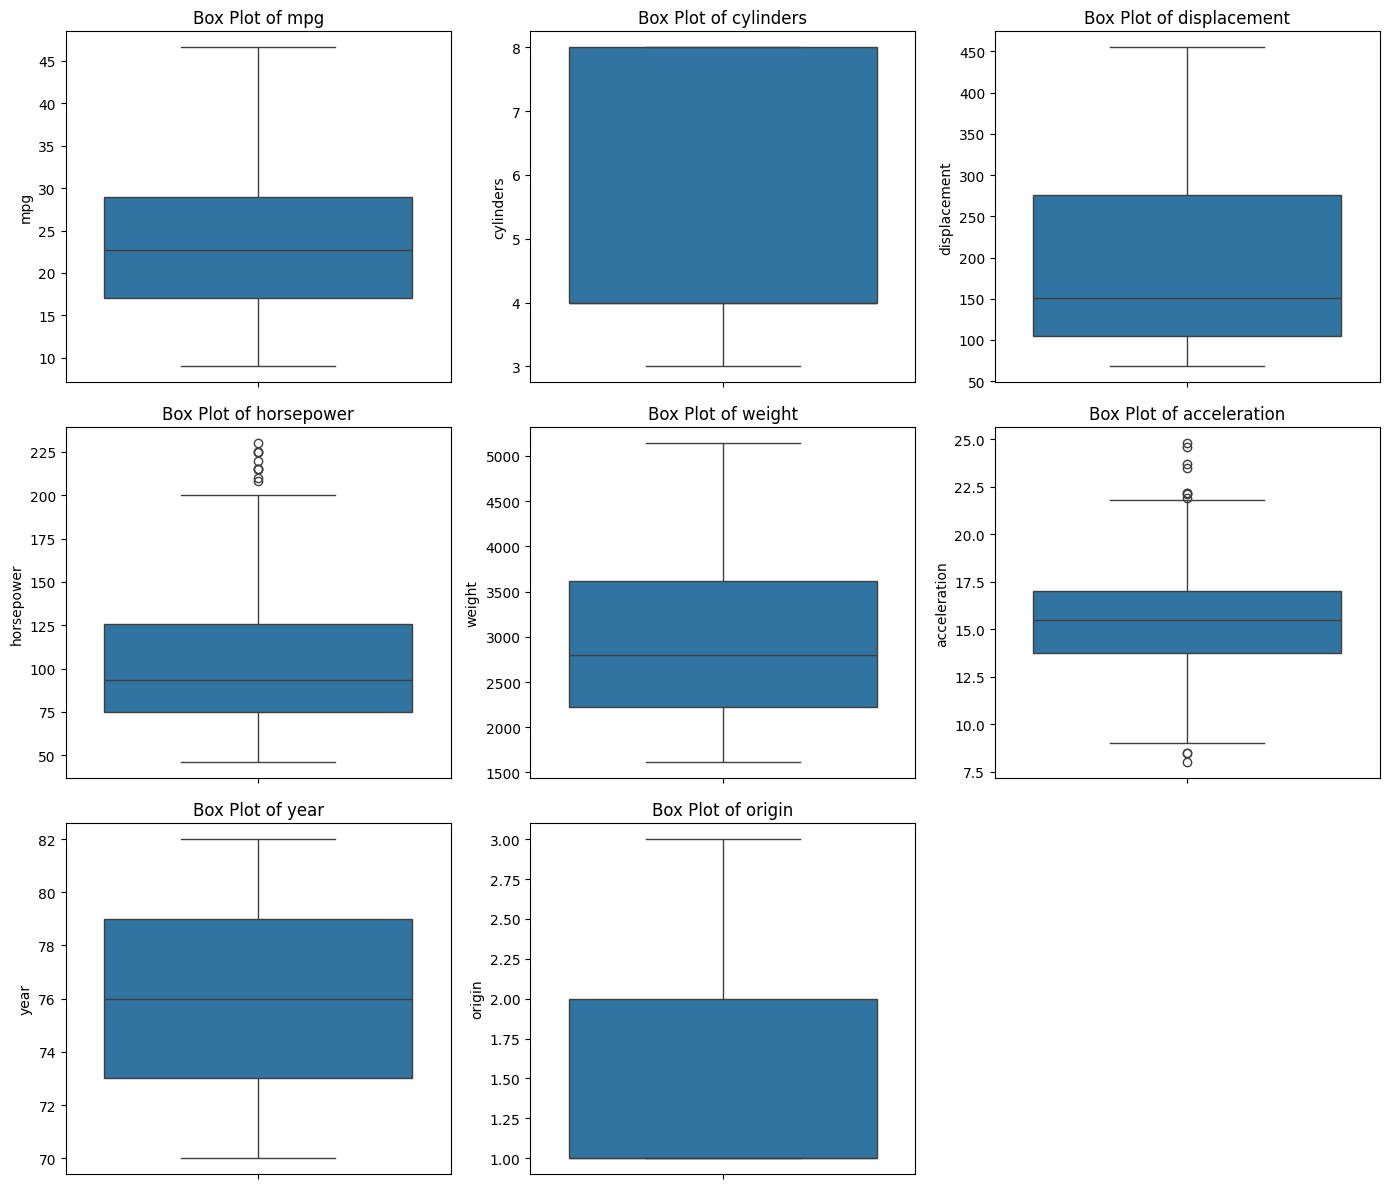

In [16]:
# Boxplot to see distribution of values

plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=auto[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

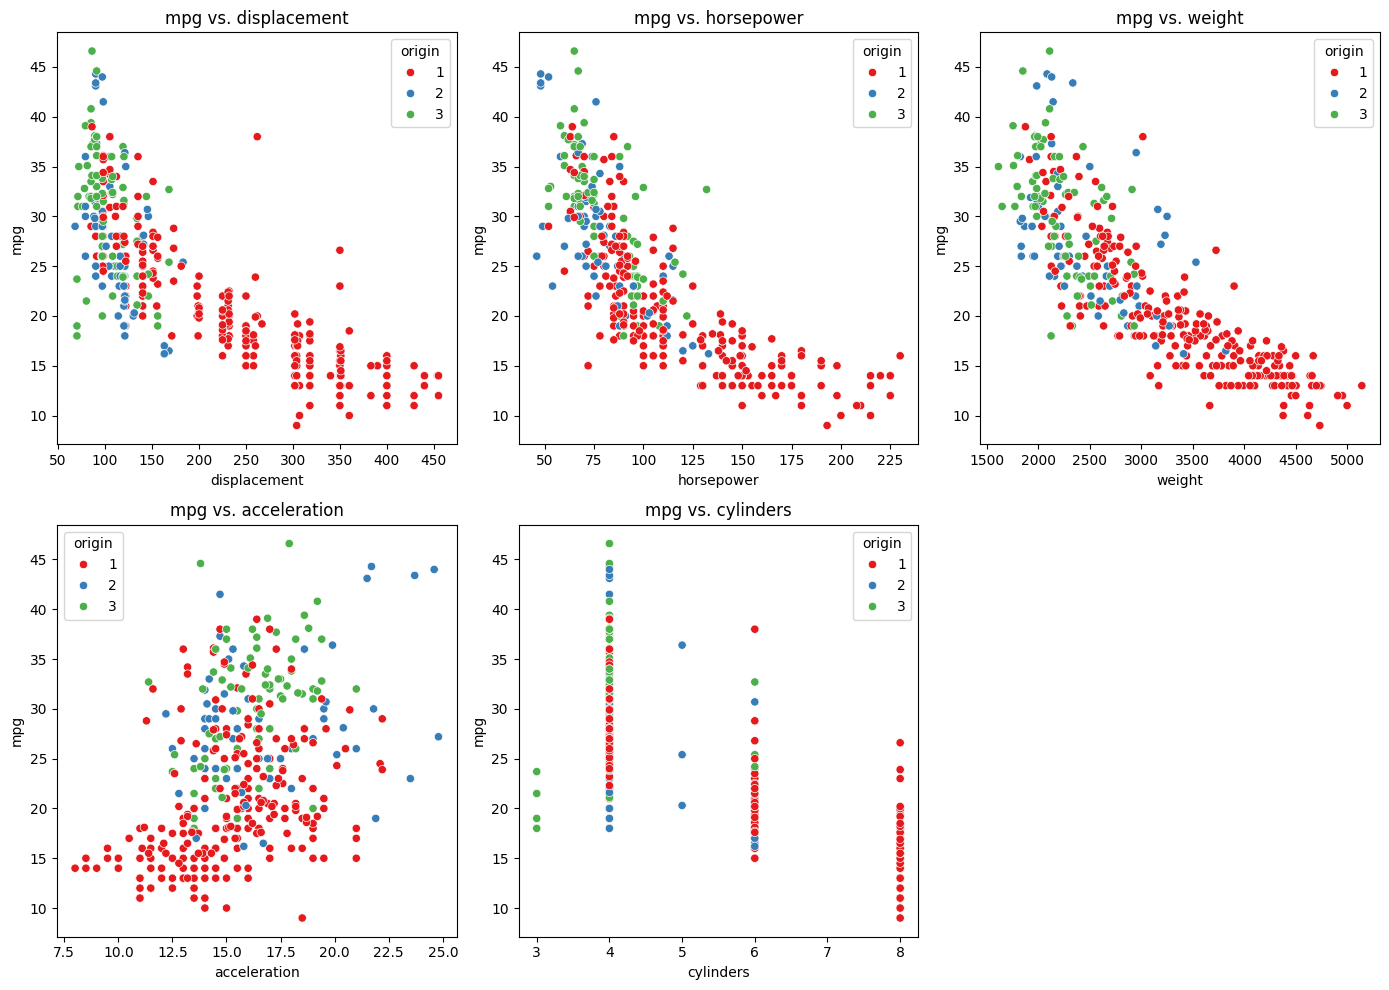

In [17]:
continuous_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']

plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=auto[var], y=auto['mpg'], hue=auto['origin'], palette='Set1')
    plt.title(f'mpg vs. {var}')
    plt.xlabel(var)
    plt.ylabel('mpg')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11775/1191373537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=auto, palette='Set2')


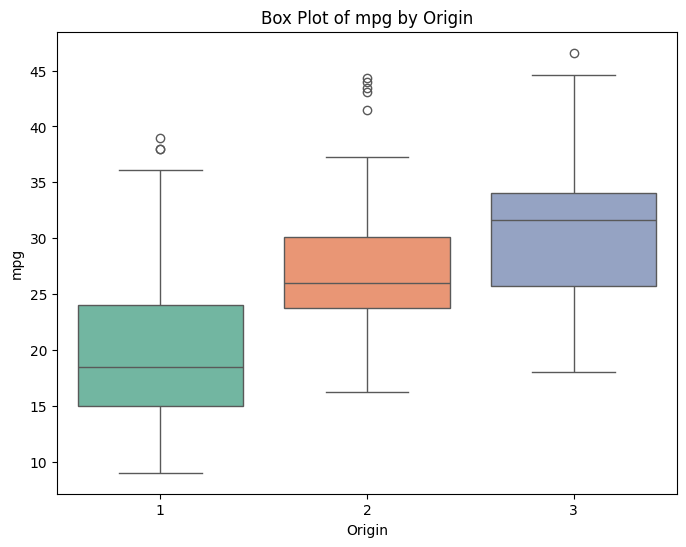

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=auto, palette='Set2')
plt.title('Box Plot of mpg by Origin')
plt.xlabel('Origin')
plt.ylabel('mpg')
plt.show()

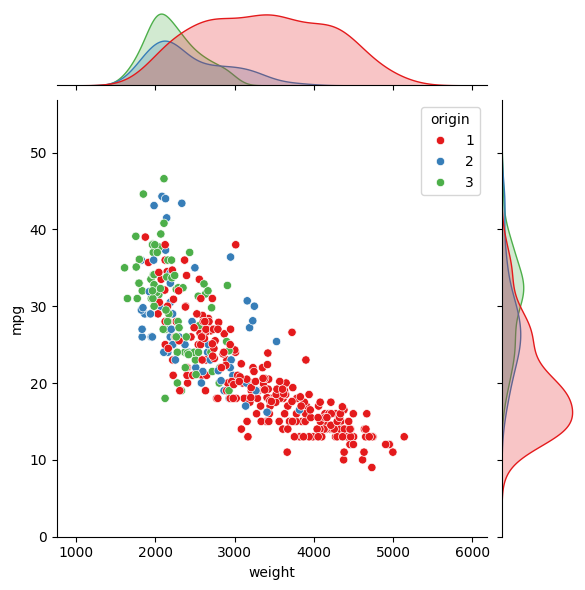

In [19]:
sns.jointplot(x='weight', y='mpg', data=auto, kind='scatter', hue='origin', palette='Set1')
plt.show()

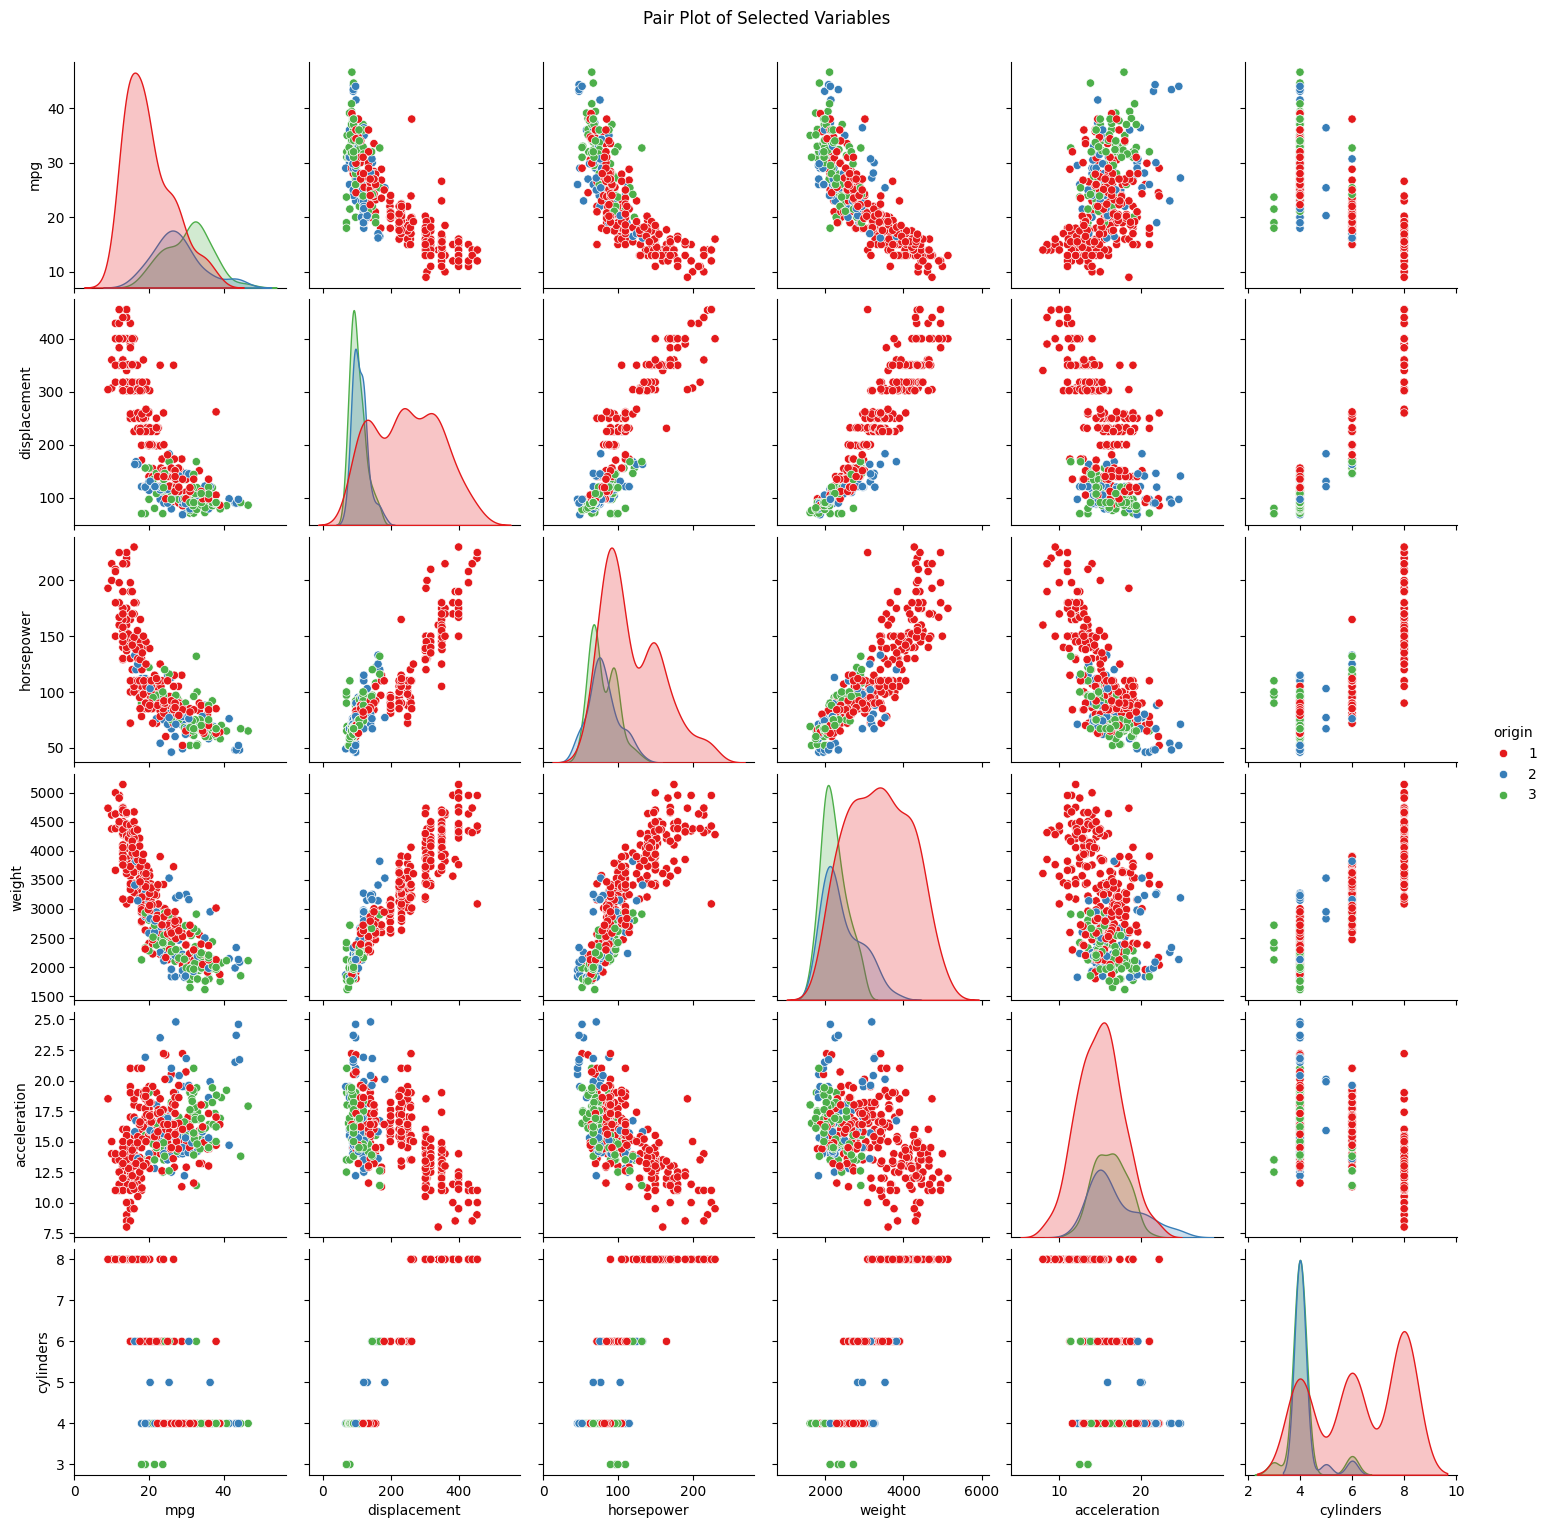

In [20]:
selected_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
sns.pairplot(auto[selected_vars], hue='origin', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

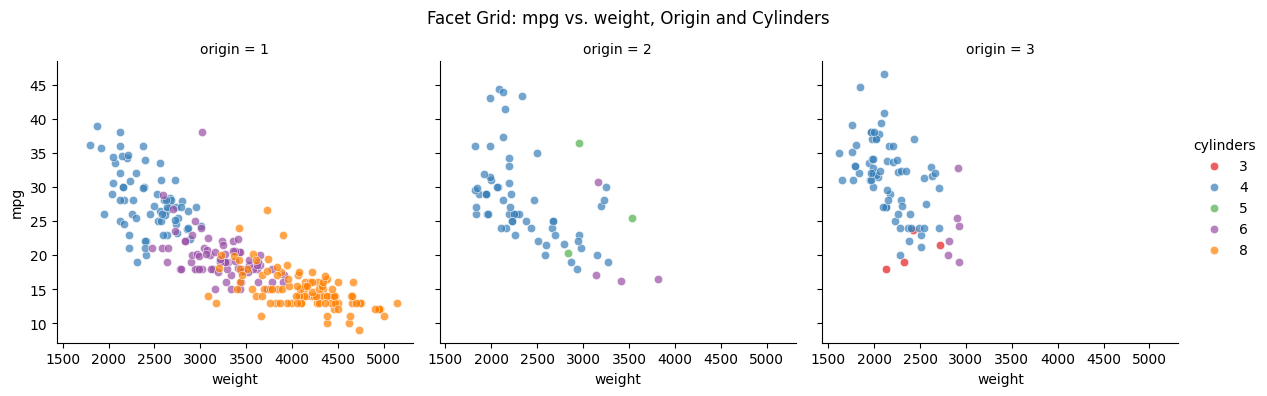

In [21]:
g = sns.FacetGrid(auto, col='origin', hue='cylinders', palette='Set1', height=4, aspect=1)
g.map(sns.scatterplot, 'weight', 'mpg', alpha=.7)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Facet Grid: mpg vs. weight, Origin and Cylinders')
plt.show()

## Part 2

- Provide a treebased model to describe mpg. Think about how to include every predictor variable properly. Fit at least one Decisiontree and at least one Ensemble method, keeping overfitting in mind. Take care to describe and investigate your model results carefully. Why and how did you choose these particular model parameters? Which method provides the best predictions? Which features are most relevant? Are there outliers which aren’t modelled properly? Provide some visualizations for your model results! [5]

In [22]:
# Remove name as it is a string column
if 'name' in auto.columns:
    auto.drop('name', axis=1, inplace=True)

# Convert origin as a category
if 'origin' in auto.columns:
    auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)

# Remove mpg from dataset as it is the target
X = auto.drop('mpg', axis=1)
# And move the target to y
y = auto['mpg']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,0,0
1,8,350.0,165,3693,11.5,70,0,0
2,8,318.0,150,3436,11.0,70,0,0
3,8,304.0,150,3433,12.0,70,0,0
4,8,302.0,140,3449,10.5,70,0,0


### DecisionTree

#### First tree without paramter tuning

In [24]:
## Create First DecisionTree and fit

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

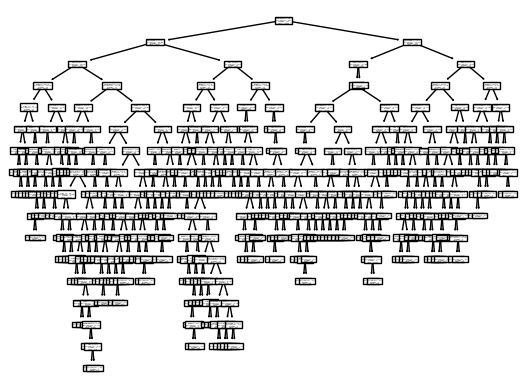

In [25]:
fig, ax = plt.subplots()
plot_tree(tree_reg, feature_names=X_train.columns, ax=ax)
plt.show()

In [26]:
print("Trainingset Score R^2 score: {}".format(tree_reg.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_reg.score(X_test, y_test)))

Trainingset Score R^2 score: 1.0
Testset Score R^2 score: 0.7870718946828993


With score of 1.0 completely overfitted.

#### Tree with parameter tuning

In [27]:
## Create DecisionTree and fit

tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=18, max_leaf_nodes=9)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=9, min_samples_leaf=18)

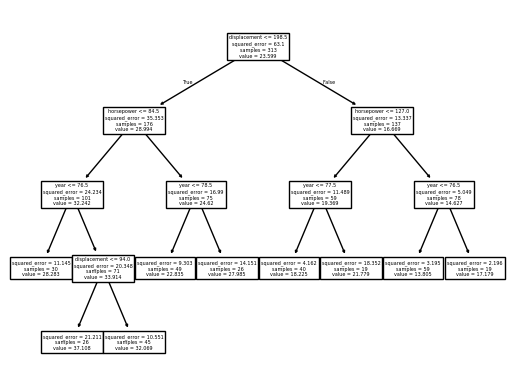

In [28]:
fig, ax = plt.subplots()
plot_tree(tree_reg, feature_names=X_train.columns, ax=ax)
plt.show()

In [29]:
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.532143380826824
R-squared: 0.7936515863987883


In [30]:
print("Trainingset Score R^2 score: {}".format(tree_reg.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_reg.score(X_test, y_test)))

Trainingset Score R^2 score: 0.8516579516258532
Testset Score R^2 score: 0.7936515863987883


Better overall.

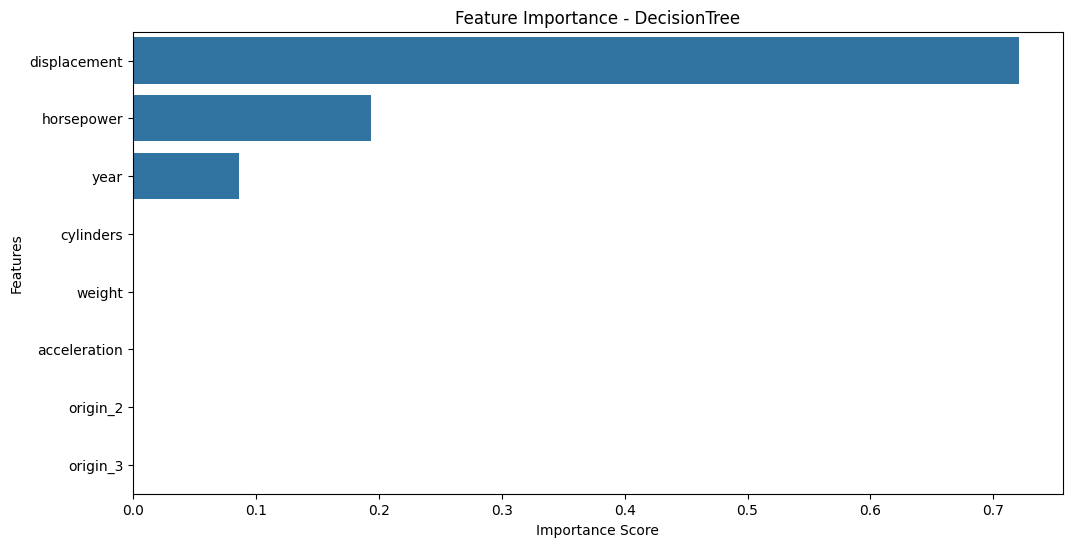

In [31]:
feature_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - DecisionTree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [32]:
ccp_path = tree_reg.cost_complexity_pruning_path(X, y)

parameter_dictionary = {'ccp_alpha': ccp_path.ccp_alphas[:-1], 'max_depth': range(2, 15), 'min_samples_leaf': range(5, 10), 'max_leaf_nodes': range(2, 15)}

from sklearn.model_selection import GridSearchCV

tree_cv_iterator = GridSearchCV(DecisionTreeRegressor(), parameter_dictionary, n_jobs=4, cv=5)
tree_cv_iterator.fit(X=X, y=y)

cv_tree = tree_cv_iterator.best_estimator_
print(tree_cv_iterator.best_score_, tree_cv_iterator.best_params_)

print("Training Score: {}".format(cv_tree.score(X_train, y_train)))
print("Test Score: {}".format(cv_tree.score(X_test, y_test)))


0.5965219554347136 {'ccp_alpha': 0.0, 'max_depth': 4, 'max_leaf_nodes': 14, 'min_samples_leaf': 5}
Training Score: 0.8752024975907965
Test Score: 0.902639357706102


### RandomForestRegressor

In [33]:
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [34]:
y_pred_forest = forest_reg.predict(X_test)

In [35]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor - Mean Squared Error: {mse_forest}")
print(f"Random Forest Regressor - R-squared: {r2_forest}")

Random Forest Regressor - Mean Squared Error: 6.348072244356885
Random Forest Regressor - R-squared: 0.8756269650265536


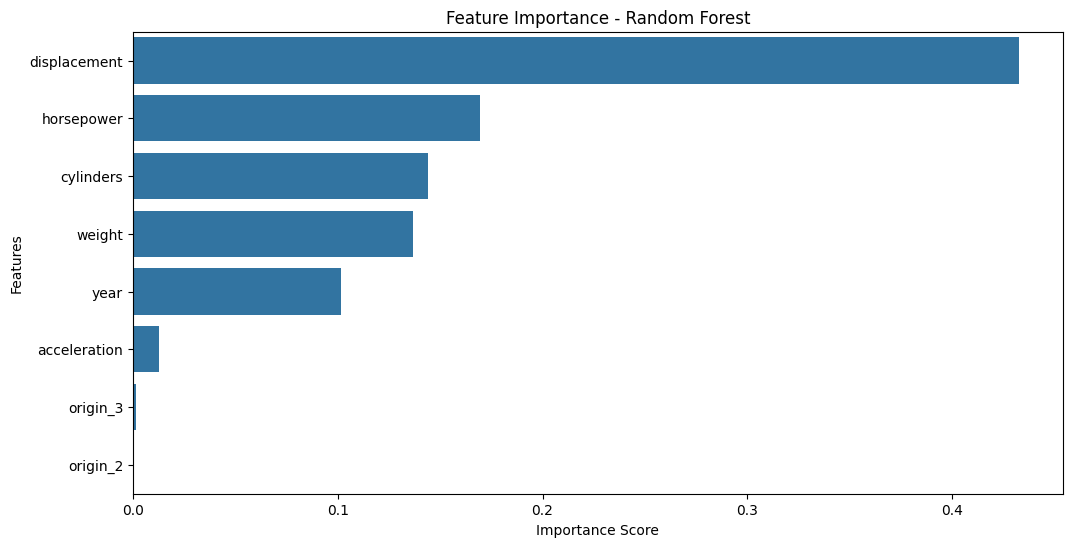

In [36]:
feature_importances = pd.Series(forest_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

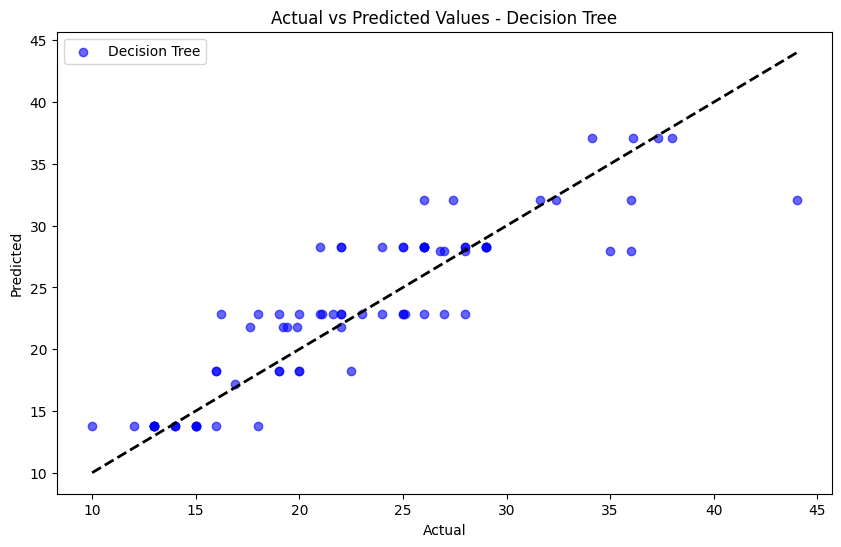

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values - Decision Tree')
plt.legend()
plt.show()

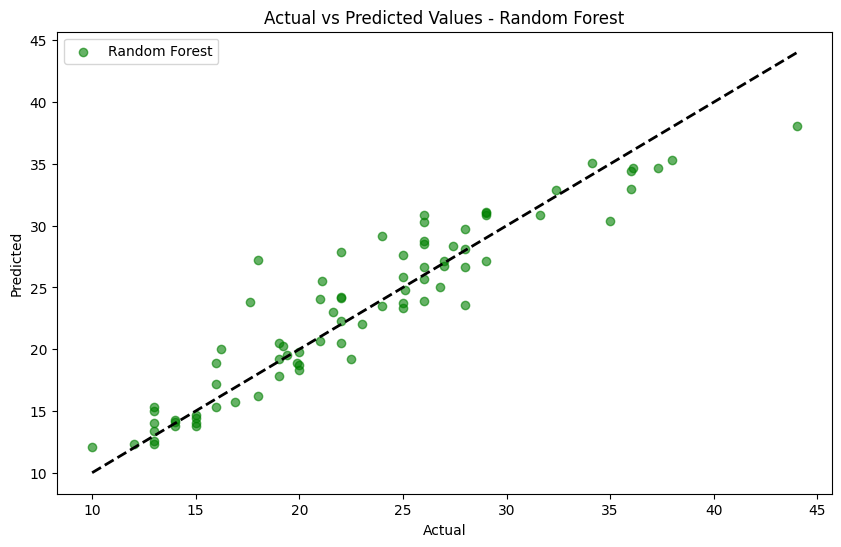

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.6, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values - Random Forest')
plt.legend()
plt.show()

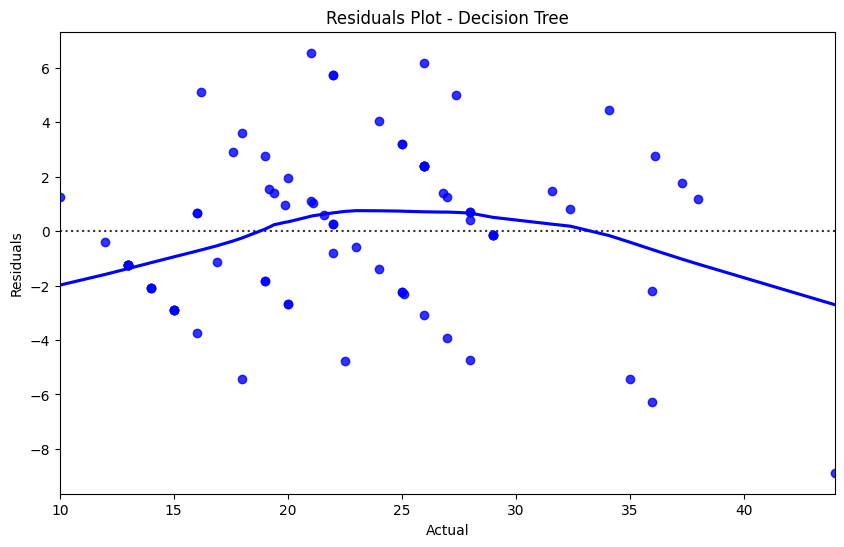

In [39]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree')
plt.show()

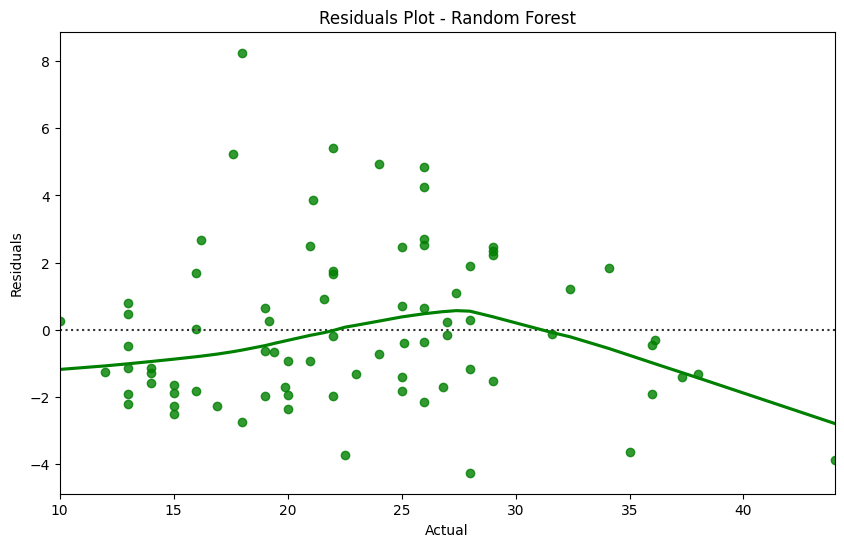

In [40]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_forest, lowess=True, color='green')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Random Forest')
plt.show()

## Part 3

Provide a treebased model to classify origin. As above, think about your predictors and how you want to include them. Fit at least one Decisiontree and at least one Ensemble method, keeping overfitting in mind. Describe your results carefully and choose your favourite model as in point 2. Which features are most relevant? Investigate the model results with appropriate measures and provide visualizations. [5]

In [41]:
# Reload data
auto = load_data("Auto")

In [42]:
# Drop the 'name' column as it is not a numeric feature
if 'name' in auto.columns:
    auto.drop('name', axis=1, inplace=True)

# Drop and move origin as it is now the target
X = auto.drop('origin', axis=1)
y = auto['origin']

In [43]:
# Split the data into training and testing sets
X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
258,18.6,6,225.0,110,3620,18.7,78
182,25.0,4,140.0,92,2572,14.9,76
172,18.0,6,171.0,97,2984,14.5,75
63,15.0,8,318.0,150,4135,13.5,72
340,39.0,4,86.0,64,1875,16.4,81


## DecisionTree

#### First tree without paramters

In [45]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

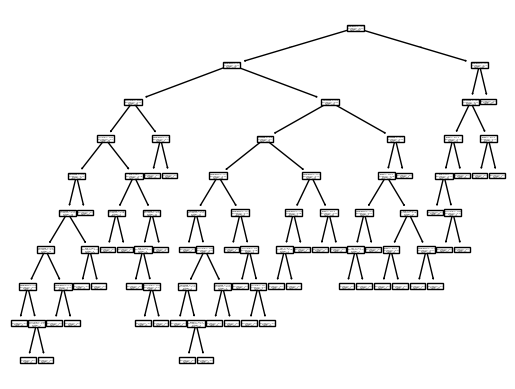

In [46]:
fig, ax = plt.subplots()
plot_tree(tree_reg, feature_names=X_train.columns, ax=ax)
plt.show()

In [47]:
print("Trainingset Score R^2 score: {}".format(tree_reg.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_reg.score(X_test, y_test)))

Trainingset Score R^2 score: 1.0
Testset Score R^2 score: 0.23652085452695826


Completely overfitted again.

#### Tree with parameters

In [48]:
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=18, max_leaf_nodes=9)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=9, min_samples_leaf=18)

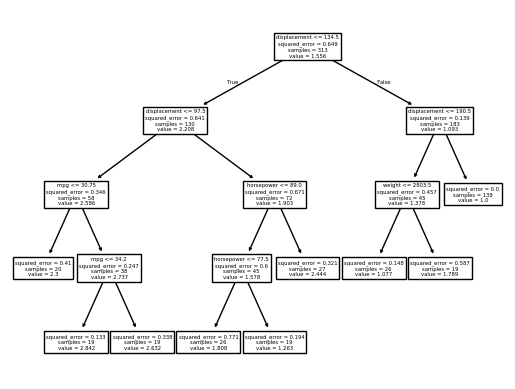

In [49]:
fig, ax = plt.subplots()
plot_tree(tree_reg, feature_names=X_train.columns, ax=ax)
plt.show()

In [50]:
print("Trainingset Score R^2 score: {}".format(tree_reg.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_reg.score(X_test, y_test)))

Trainingset Score R^2 score: 0.6824899952029237
Testset Score R^2 score: 0.5883932194992785


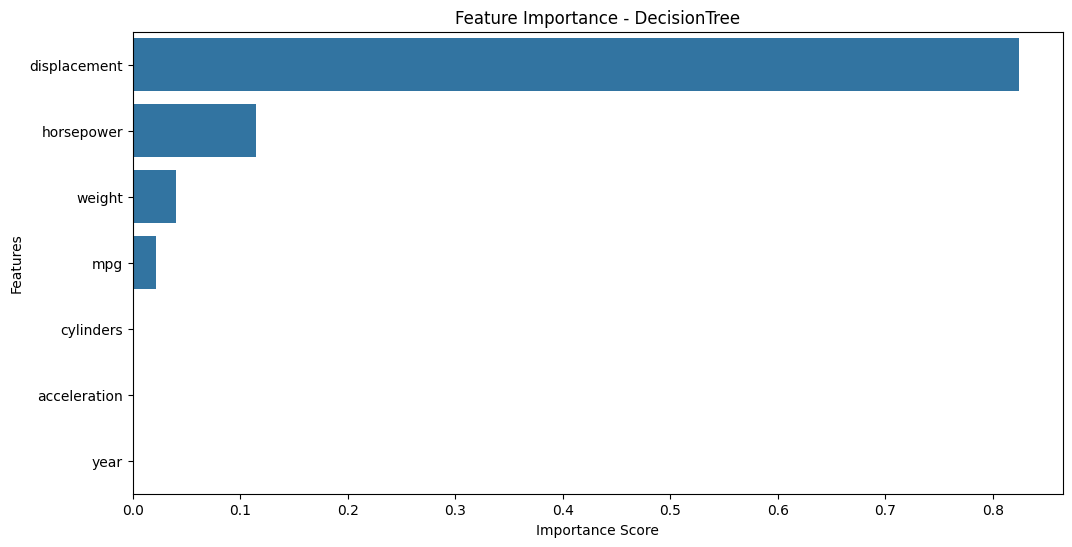

In [51]:
feature_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - DecisionTree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

parameter_dictionary = {'max_depth': range(2, 15), 'min_samples_leaf': range(5, 10), 'max_leaf_nodes': range(2, 15)}
tree_cv_iterator = GridSearchCV(DecisionTreeRegressor(), parameter_dictionary, n_jobs=4, cv=5)
tree_cv_iterator.fit(X=X, y=y)

cv_tree = tree_cv_iterator.best_estimator_
print(tree_cv_iterator.best_score_, tree_cv_iterator.best_params_)

print("Training Score: {}".format(cv_tree.score(X_train, y_train)))
print("Test Score: {}".format(cv_tree.score(X_test, y_test)))

0.6020137310574089 {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 8}
Training Score: 0.7385148715048528
Test Score: 0.7899799566083724


### RandomForestRegressor

In [53]:
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [54]:
y_pred_forest = forest_reg.predict(X_test)

In [55]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor - Mean Squared Error: {mse_forest}")
print(f"Random Forest Regressor - R-squared: {r2_forest}")

Random Forest Regressor - Mean Squared Error: 0.21807988513394397
Random Forest Regressor - R-squared: 0.6538564183313976


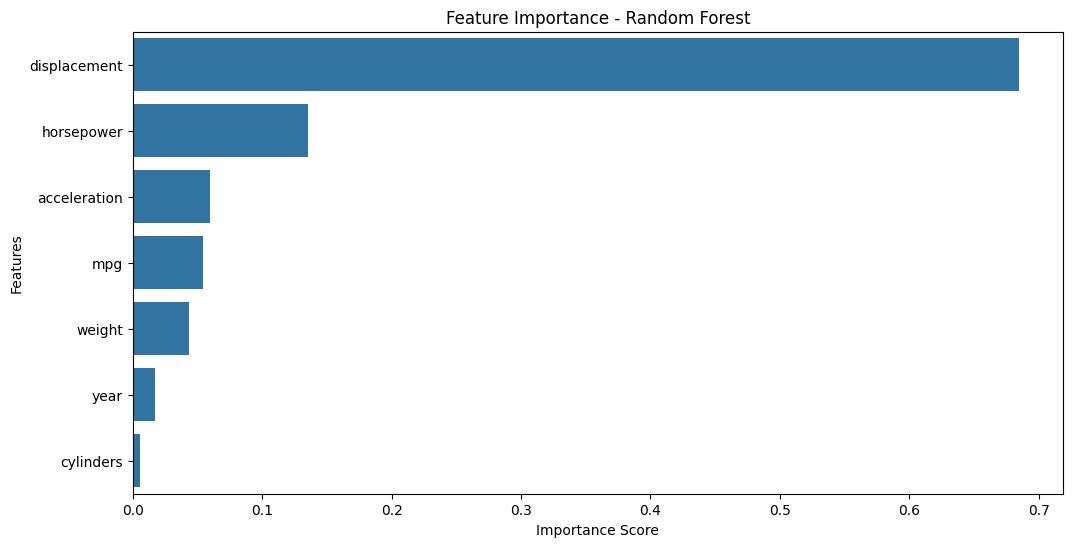

In [56]:
feature_importances = pd.Series(forest_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()